# Week 7 worksheet solution

In this worksheet we will explore some of the basic concepts of statistical pattern analysis and linear data projection.

## Gaussian distribution


In [14]:
import matplotlib.pyplot as plt
import numpy as np

We start by generating 3000 data values from a one-dimensional Gaussian with mean 2 and variance 5. Note how the seed of the random number generator has been fixed to enable us to reproduce results reliably. This is crucial for debugging and auditing applications of data science.

In [15]:
from numpy.random import Generator, PCG64
mean = 2
sigma = np.sqrt(5)
rng = Generator(PCG64(12345))
vals = mean + sigma*rng.standard_normal(3000)

Plot a histogram of this data with 30 bins

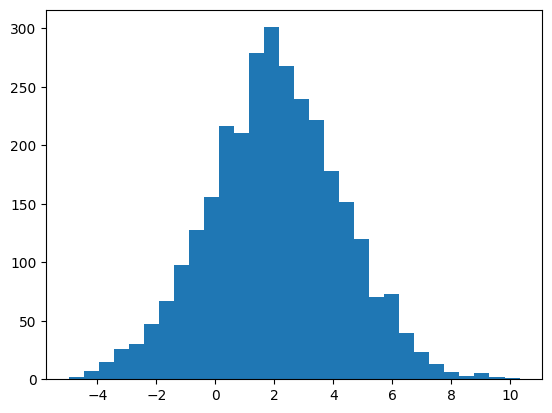

In [16]:
plt.hist(vals, 30)
plt.show()

Now compute the maximum likelihood estimates of the mean and standard deviation of the data. Print the values and make a note of them.

In [17]:

m = np.mean(vals)
s = np.std(vals)
print('mean is ' + str(m) + ' and standard deviation ' + str(s))

mean is 2.0381501662458694 and standard deviation 2.25589811730036


That is one result for maximum likelihood estimation based on a single sample from the distribution. Now we will do this 100 times with a smaller sample (of size 10) and compare the average estimate of the mean (over the 100 iterations) with its true value and the average estimate of the variance (over the 100 iterations) with its true value. (Continue with the random number generator in its current state (i.e. do not reset it)). Print out these values and make a note of them for the quiz later.

In [18]:

meanList = []
varList = [] 
# Run a loop 
for n in range(100) :
    vals = mean + sigma*rng.standard_normal(10)
    meanList.append(np.mean(vals))
    varList.append(np.var(vals))


print('Average mean is ' + str(np.mean(meanList)) + ' and average variance is ' + str(np.mean(varList)))
    

Average mean is 1.9335027828547504 and average variance is 4.550291957252243


## Principal Component Analysis (PCA) for data projection

In this section we will explore the theory and practice of PCA for data projection.

We start by reading in the oil flow dataset mentioned in the lectures. The ID field is simply the index of the row in the dataset (starting from 1). The variables have the imaginative names v1, v2, etc. While the final column is the class label, which will be treated separately.

In [19]:
import pandas 

df = pandas.read_csv('oil(1).csv', index_col='ID')
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,Label
ID,,,,,,,,,,,,,
1,0.3315,0.2156,0.6802,0.1434,0.6825,0.2720,0.6223,0.2092,0.7961,0.1530,0.5856,0.2573,1
2,0.5184,0.2283,0.5300,0.6884,0.7456,0.6171,0.6136,0.5928,0.7678,0.6130,0.6705,0.5202,1
3,0.0760,0.5010,0.1870,0.7011,0.1728,0.8475,0.2300,0.6536,0.1616,0.8732,0.1603,0.7331,1
4,0.3334,0.5468,0.6072,0.7549,0.6294,0.9322,0.5850,0.7859,0.6324,0.9568,0.6026,0.7616,1
5,0.1703,0.2234,0.2677,0.3477,0.2734,0.4324,0.1222,0.5213,0.2333,0.4926,0.2044,0.4215,1


Next, compute the data matrix `X` (just v1 to v12), compute the covariance matrix and then carry out an eigendecomposition: check the `numpy` definitions of the appropriate functions. Store the eigenvalues in a variable `eval` and the eigenvectors in a variable `evec`. Start by using the `eig` function. 

Note that in the `eig` function each row of the matrix parameter represents a variable, and each column a single observation of all those variables. This is the opposite to the convention in Matlab and in Chris Bishop's book. Either apply a transpose operator or set the `rowvar` parameter to `false`.

In [20]:
from numpy import linalg as LA
data = df.to_numpy()
ncols = data.shape[1]

X = data[:,0:ncols-1]
label = data[:,ncols-1]

Sigma = np.cov(X.T)

print (Sigma)

eval, evec = LA.eig(Sigma)



[[ 0.14019949 -0.08589324  0.06776892 -0.01133282  0.04313138 -0.03768868
   0.04104223 -0.03214379  0.08816667 -0.11334043  0.08501401  0.03370391]
 [-0.08589324  0.09257087 -0.04798201  0.04894398 -0.03590649  0.05970288
  -0.02594611  0.04480408 -0.0634673   0.12756533 -0.06325459  0.03289725]
 [ 0.06776892 -0.04798201  0.10306317 -0.05352731  0.09891247 -0.04398334
   0.13505423 -0.09043589  0.11247413 -0.0471665   0.06662363 -0.01244803]
 [-0.01133282  0.04894398 -0.05352731  0.13002864 -0.05646418  0.10731123
  -0.08098284  0.1339611  -0.05154947  0.10297211 -0.02212649  0.12476803]
 [ 0.04313138 -0.03590649  0.09891247 -0.05646418  0.112728   -0.04726421
   0.15299397 -0.10020064  0.11351963 -0.02529122  0.04957556 -0.02268723]
 [-0.03768868  0.05970288 -0.04398334  0.10731123 -0.04726421  0.12194038
  -0.06677846  0.11364056 -0.04278751  0.12544301 -0.0240269   0.10378617]
 [ 0.04104223 -0.02594611  0.13505423 -0.08098284  0.15299397 -0.06677846
   0.38821594 -0.25512859  0.075

Now we list and plot the eigenvalues. 

[1.00397935 0.70361087 0.40052509 0.18069873 0.13371042 0.06415758
 0.00178382 0.00485289 0.01219935 0.01833937 0.03510271 0.03520677]


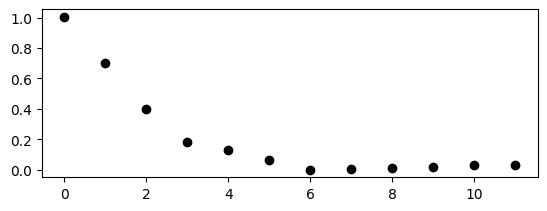

In [21]:
print (eval)
plt.figure()
plt.subplot(211)
plt.plot( eval, 'ok')

We note that they are not monotonically decreasing: for example, the 7th entry 0.00178 is smaller than the eighth 0.00485. 

We can see the effect of different algorithms for calculating the eigenvalues and eigenvectors. The `eigh` function is specialised for working with symmetric matrices: it is faster and more accurate than `eig` in this case. Use it to compute eigenvalues and eigenvectors for this task (again with the same variable names). 

[0.00178382 0.00485289 0.01219935 0.01833937 0.03510271 0.03520677
 0.06415758 0.13371042 0.18069873 0.40052509 0.70361087 1.00397935]


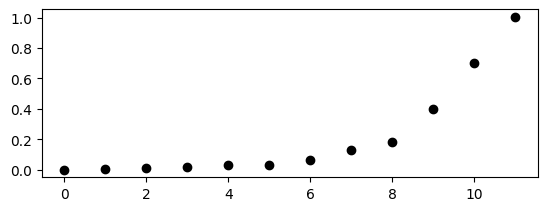

In [22]:
eval, evec = LA.eigh(Sigma)
print (eval)
plt.subplot(212)
plt.plot( eval, 'ok')
plt.show()

The next task is to sort the eigenvalues in descending order. (If we were using the vectors to project the data, we would have to rearrange the eigenvectors correspondingly). 

Then you should write code to compute the cumulative sums of the resulting vector and express the values as a fraction of the total of the eigenvalues (compare with the lecture notes). Plot the cumulative sum. I have provided code to draw a threshold at 0.95.

Sorted eigenvalues [1.00397935 0.70361087 0.40052509 0.18069873 0.13371042 0.06415758
 0.03520677 0.03510271 0.01833937 0.01219935 0.00485289 0.00178382]


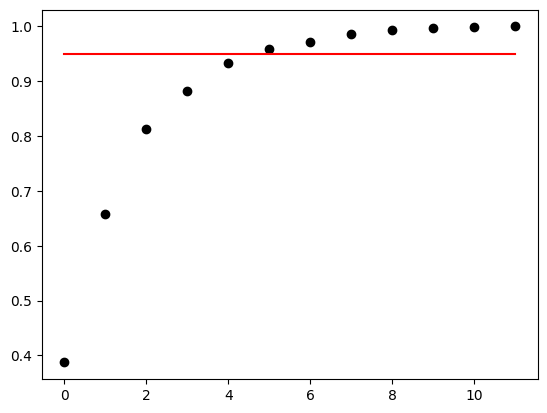

In [23]:
#Sort the eigenvalues - should also reorder the eigenvectors if applying them
sorted_eval = np.sort(eval)
eval = sorted_eval[::-1]  # reverse the order so that it is decreasing
print("Sorted eigenvalues " + str(eval))
cumuleval = np.cumsum(eval)
total = np.sum(eval)
cumuleval = cumuleval/total

# Plot cumulative sum of eigenvalues with a threshold at 0.95
plt.figure(3)
plt.plot(cumuleval, 'ok')
xvals = range(data.shape[1] - 1)
plt.plot(xvals, 0.95*np.ones(np.shape(eval)), 'r-')
plt.show()

Note that we require 6 eigenvectors for the proportion of variance explained to exceed 0.95.

Now write code to apply PCA (look up the function definition) with 2 principal components and then project the data onto this space using the `transform` function (which automatically subtracts off the mean of each variable). Call the resulting variable `projX`. Generate a scatter plot of the result.

Explained variance ratio [0.38701416 0.27122806]


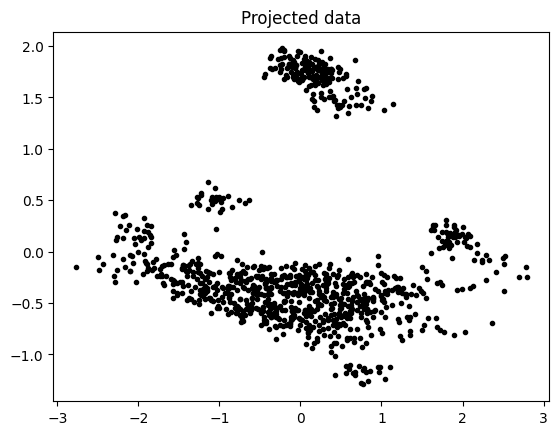

In [24]:
# Now apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
# This should equal the sum of the first two values in the cumulative proportion plot
print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

# Project data onto first two principal components
projX = pca.transform(X)
plt.figure(4)
plt.plot(projX[:,0], projX[:,1], 'k.')
plt.title('Projected data')
plt.show()

This graph is interesting - it shows the structure of the data quite well in terms of clusters and outliers. But we also have extra information that we can plot: namely the class labels. The following piece of code uses the label to colour each mark: red circle, green cross, and blue square for labels 1, 2, and 3 respectively.

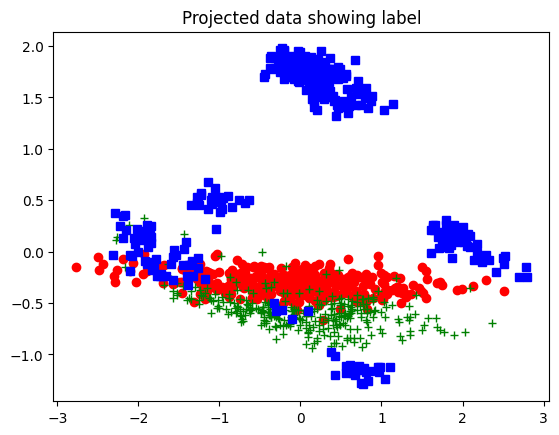

In [25]:
# Now plot the data with a different mark for each label
marks = ('ro', 'g+', 'bs')
plt.figure(6)
for n in range(1, 4, 1) :
    projClass = projX[np.equal(label, n*np.ones(label.shape))]
    plt.plot(projClass[:,0], projClass[:,1], marks[n-1])

plt.title('Projected data showing label')
plt.show()

## PCA: dimensionality reduction

In this section, we will explore the use of PCA for dimensionality reduction and reconstruction. We will work with the digit dataset provided by `sklearn`, though it does have drawbacks given the small $8 \times 8$ size of the images.

Here we load the data and then display the first image, which is a zero.

<Figure size 640x480 with 0 Axes>

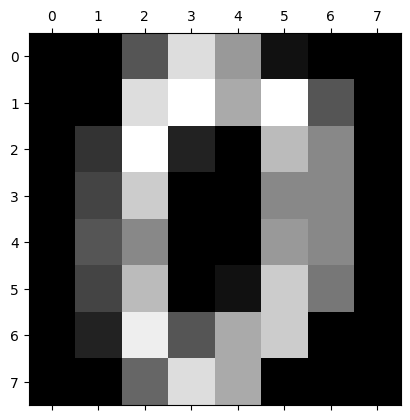

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

If you haven't seen this dataset before, it is useful to know what the objects are stored with it. Note that `data` is a matrix with one digit per row and 64 columns (representing the 64 pixel values) while `images` is a list of images each of which is an $8\times 8$ matrix.

In [27]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


Next, compute the top 30 principal components of the `data` and then show the first component as an image. N.B. You will need to reshape the component as an $8\times 8$ matrix before plotting it.

<Figure size 640x480 with 0 Axes>

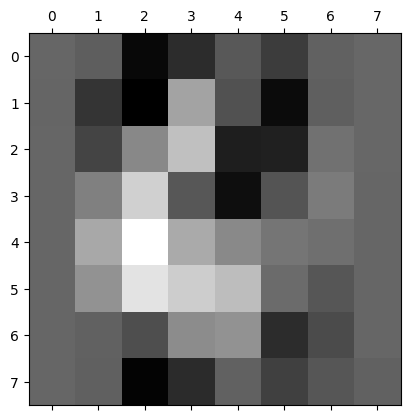

In [28]:
#Find first eigendigit for whole dataset
# 30 components is not bad - can't be bigger than 64 as that is the dimensionality of the feature space
pca = PCA(n_components = 30)
pca.fit(digits.data)
eigendigit = pca.components_[0, :]
eigendigit = eigendigit.reshape(8, 8)
plt.figure()
plt.gray()
plt.matshow(eigendigit)
plt.show()

Next you should write code to project the first few rows (say $10$) of the data to the PCA subspace (using `transform`) and then _reconstruct_ the first digit in the original space using the `inverse_transform` function. Display the reconstructed digit as an image as before.

<Figure size 640x480 with 0 Axes>

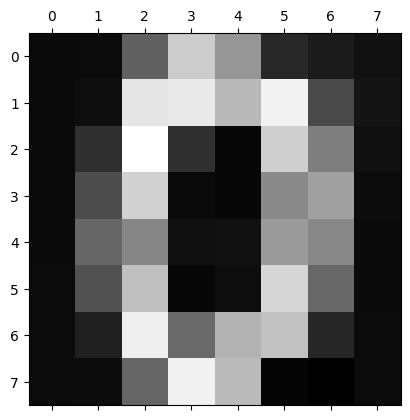

In [29]:
# Transform and then reconstruct first image
# Transform seems to expect more than one row
projected_digit = pca.transform(digits.data[range(0,10),:])
reconstructed_digit = pca.inverse_transform(projected_digit[0,:])
reconstructed_digit = reconstructed_digit.reshape(8, 8)
plt.figure()
plt.gray()
plt.matshow(reconstructed_digit)
plt.show()

By printing the first few values of the targets, we see that the digits are encoded by the corresponding number 0-9. 

In [30]:
print(digits.target[0:20])


[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


You can use this fact to create a subset of the data consisting only of the digit 3. Write code to do this (you may find it useful to look at the indexing trick in the definition of `projClass` above) and then compute and show the first principal component. We can call it an _eigendigit_. How does this compare with the principal component computing on the entire dataset? Why do you think there is a difference?

<Figure size 640x480 with 0 Axes>

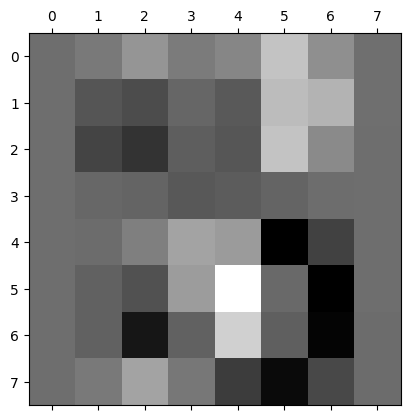

In [31]:
# Now find first eigendigit for digit 3
digit_three = digits.data[np.equal(digits.target, 3*np.ones(digits.target.shape))]
pca = PCA(n_components = 10)
pca.fit(digit_three)
eigendigit = pca.components_[0, :]
eigendigit = eigendigit.reshape(8, 8)
plt.figure()
plt.gray()
plt.matshow(eigendigit)
plt.show()

The eigendigit for the entire dataset shows all the variations in all the digits so is not recognisably related to any specific digit. The low resolution makes interpretation difficult, but there is some indication that the eigendigit for 3 does have some structure in it.

## Fisher linear discriminant
In this final exercise, we will explore the Fisher linear discriminant implementation and compare the results with PCA. We will work with the oil data again and extract the last column to a vector `label`.

In [32]:
# Work with oil data again

df = pandas.read_csv('oil(1).csv', index_col='ID')
df.head()

data = df.to_numpy()
ncols = data.shape[1]

X = data[:,0:ncols-1]
label = data[:,ncols-1]

Now apply `LinearDiscriminantAnalysis` from `sklearn` and project the data to a variable `projX`. The rest of the code in the next block plots the data in the same way as for PCA above. Write down two differences between the PCA and Fisher discriminant projections.

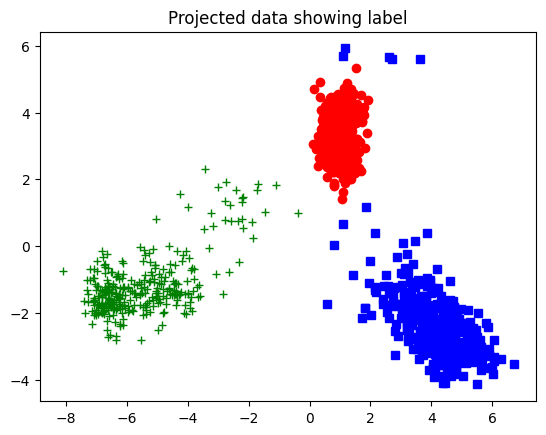

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X, label)
projX = clf.transform(X)

# Now plot the data with a different mark for each label
marks = ('ro', 'g+', 'bs')
plt.figure()
for n in range(1, 4, 1) :
    projClass = projX[np.equal(label, n*np.ones(label.shape))]
    plt.plot(projClass[:,0], projClass[:,1], marks[n-1])

plt.title('Projected data showing label')
plt.show()

1. There is better class separation in Fisher discriminant projection.
1. But there is less structure within class 3 (blue square) in Fisher discriminant. It forms a single cluster (more or less) while in the PCA plot we can see several clusters within it.